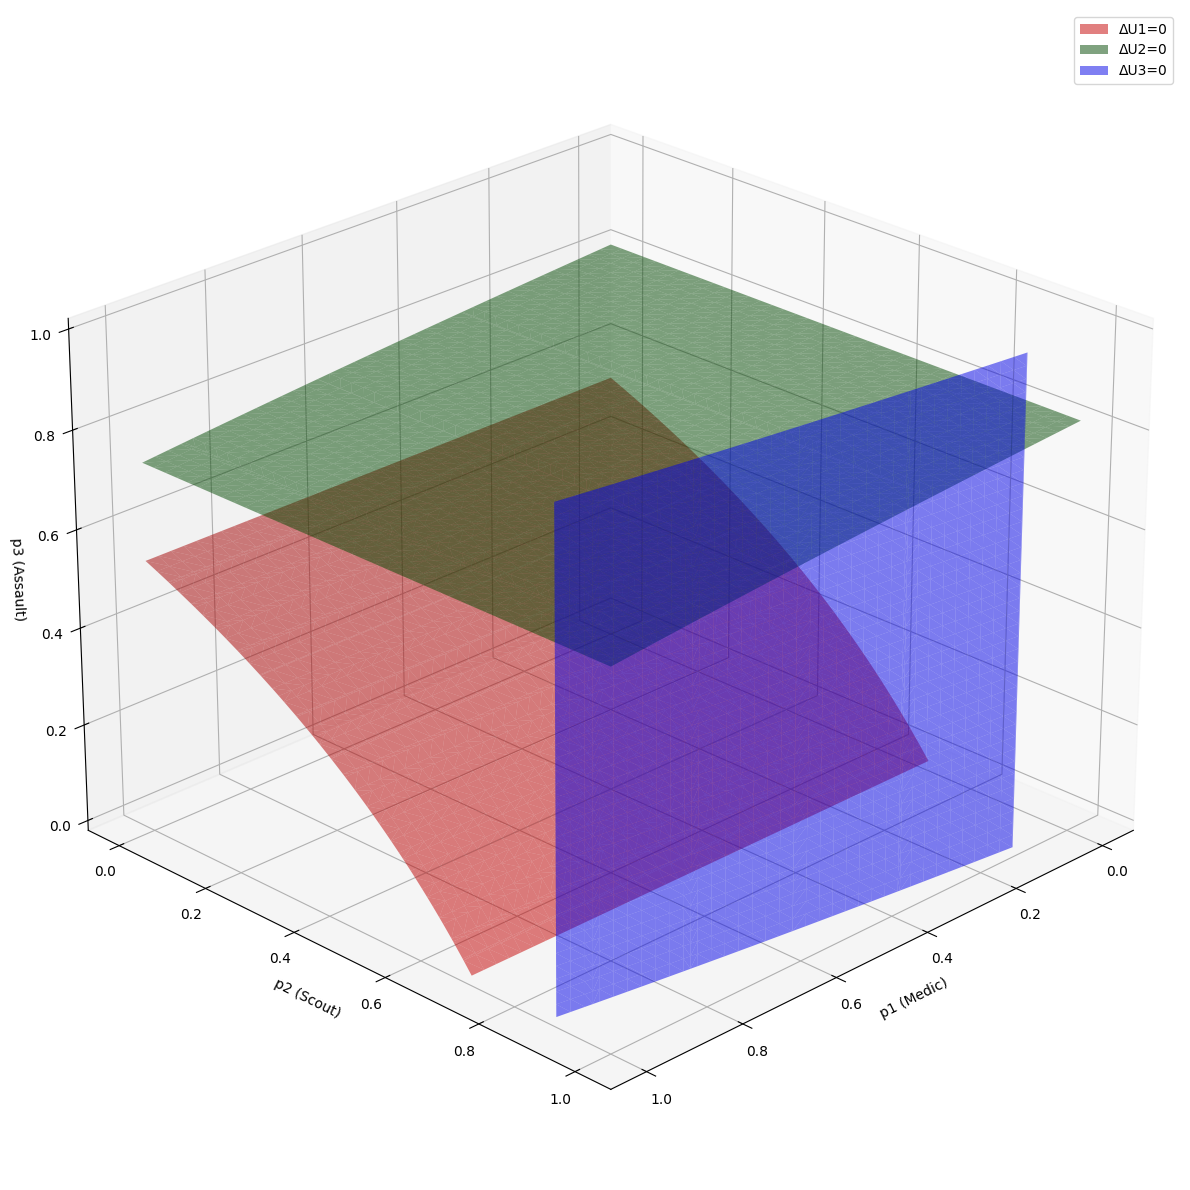

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Parameters
alpha = [0.2, 1.0, 1.8]
cost = [0.1, 0.2, 0.3]

def delta_U(i, p_other1, p_other2):
    """Calculate ΔU for player i, given probabilities of the other two players"""
    players = [0, 1, 2]
    players.remove(i)
    j, k = players
    
    # Expected success probability if player i exerts effort
    P1 = (1-p_other1)*(1-p_other2)*(1-np.exp(-alpha[i]))
    P1 += p_other1*(1-p_other2)*(1-np.exp(-(alpha[i] + alpha[j])))
    P1 += (1-p_other1)*p_other2*(1-np.exp(-(alpha[i] + alpha[k])))
    P1 += p_other1*p_other2*(1-np.exp(-(alpha[i] + alpha[j] + alpha[k])))
    
    # Expected success probability if player i does not exert effort
    P0 = (1-p_other1)*(1-p_other2)*(1-np.exp(0))
    P0 += p_other1*(1-p_other2)*(1-np.exp(-alpha[j]))
    P0 += (1-p_other1)*p_other2*(1-np.exp(-alpha[k]))
    P0 += p_other1*p_other2*(1-np.exp(-(alpha[j] + alpha[k])))
    
    return (P1 - P0) - cost[i]

# Create 3D grid
n_points = 40
p0 = np.linspace(0, 1, n_points)
p1 = np.linspace(0, 1, n_points)
p2 = np.linspace(0, 1, n_points)

P0, P1, P2 = np.meshgrid(p0, p1, p2, indexing='ij')

# Calculate ΔU values on the 3D grid
DU0 = delta_U(0, P1, P2)
DU1 = delta_U(1, P0, P2)
DU2 = delta_U(2, P0, P1)

fig = plt.figure(figsize=(13, 12))
ax = fig.add_subplot(111, projection='3d')

# Extract and plot ΔU0=0 isosurface (red)
verts0, faces0, _, _ = measure.marching_cubes(DU0, level=0, spacing=(1, 1, 1))
verts0[:, 0] = verts0[:, 0] * (1/(n_points-1)) * (p0[-1] - p0[0]) + p0[0]
verts0[:, 1] = verts0[:, 1] * (1/(n_points-1)) * (p1[-1] - p1[0]) + p1[0]
verts0[:, 2] = verts0[:, 2] * (1/(n_points-1)) * (p2[-1] - p2[0]) + p2[0]
ax.plot_trisurf(verts0[:, 0], verts0[:, 1], faces0, verts0[:, 2],
                color='red', alpha=0.5, label='ΔU1=0')

# Extract and plot ΔU1=0 isosurface (green)
verts1, faces1, _, _ = measure.marching_cubes(DU1, level=0, spacing=(1, 1, 1))
verts1[:, 0] = verts1[:, 0] * (1/(n_points-1)) * (p0[-1] - p0[0]) + p0[0]
verts1[:, 1] = verts1[:, 1] * (1/(n_points-1)) * (p1[-1] - p1[0]) + p1[0]
verts1[:, 2] = verts1[:, 2] * (1/(n_points-1)) * (p2[-1] - p2[0]) + p2[0]
ax.plot_trisurf(verts1[:, 0], verts1[:, 1], faces1, verts1[:, 2],
                color='green', alpha=0.5, label='ΔU2=0')

# Extract and plot ΔU2=0 isosurface (blue)
verts2, faces2, _, _ = measure.marching_cubes(DU2, level=0, spacing=(1, 1, 1))
verts2[:, 0] = verts2[:, 0] * (1/(n_points-1)) * (p0[-1] - p0[0]) + p0[0]
verts2[:, 1] = verts2[:, 1] * (1/(n_points-1)) * (p1[-1] - p1[0]) + p1[0]
verts2[:, 2] = verts2[:, 2] * (1/(n_points-1)) * (p2[-1] - p2[0]) + p2[0]
ax.plot_trisurf(verts2[:, 0], verts2[:, 1], faces2, verts2[:, 2],
                color='blue', alpha=0.5, label='ΔU3=0')

# Set labels and title
ax.set_xlabel('p1 (Medic)')
ax.set_ylabel('p2 (Scout)')
ax.set_zlabel('p3 (Assault)')

# Add legend
ax.legend()

# Set view angle for better visualization
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()